# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# 設定 data_path
dir_data = 'D:/GitHub/Data/Data1'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
##app_train.head()



Path of read in data: D:/GitHub/Data/Data1\application_train.csv


In [3]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = []
 
for i in app_train.dtypes:
    if i not in dtype_select and i != object :
        print(i)
        dtype_select.append(i)

 
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
  
dtype_select

int64
float64


[dtype('int64'), dtype('float64')]

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [4]:
# 先篩選數值型的欄位
dtype_select = []
 
for i in app_train.dtypes:
    if i not in dtype_select and i != object  :
        print(i)
        dtype_select.append(i) 

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
  
 
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print( "Numbers of remain columns" + ' ' + str(len(numeric_columns)))

int64
float64
Numbers of remain columns 73


In [5]:
numeric_columns
tmpList = []
# 檢視這些欄位的數值範圍＿
for col in numeric_columns:
    tmpList = []
tmpList = app_train["AMT_INCOME_TOTAL"]
print(type(tmpList))
print(type(app_train["AMT_INCOME_TOTAL"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [6]:
dictTrain = {}

for col in numeric_columns:
    dictTrain[col] = app_train[col]

dictTrain

{'AMT_ANNUITY': 0         24700.5
 1         35698.5
 2          6750.0
 3         29686.5
 4         21865.5
 5         27517.5
 6         41301.0
 7         42075.0
 8         33826.5
 9         20250.0
 10        21177.0
 11        10678.5
 12         5881.5
 13        28966.5
 14        32778.0
 15        20160.0
 16        26149.5
 17        13500.0
 18         7875.0
 19        17563.5
 20        21375.0
 21        37561.5
 22        32521.5
 23        23850.0
 24        12703.5
 25        11074.5
 26        27076.5
 27        23827.5
 28        57676.5
 29         9000.0
            ...   
 307481    19975.5
 307482    34969.5
 307483    16479.0
 307484    35617.5
 307485     9000.0
 307486    18283.5
 307487    31473.0
 307488    13351.5
 307489    23089.5
 307490     9148.5
 307491    31522.5
 307492    43443.0
 307493    37678.5
 307494    46858.5
 307495    23773.5
 307496    16875.0
 307497    12028.5
 307498    52168.5
 307499    12694.5
 307500    35982.0
 307501    11871

In [ ]:
import matplotlib

### 直方圖看分佈
df1 = pd.DataFrame(dictTrain) 
#params = {'axes.titlesize':'32',
#          'xtick.labelsize':'24',
#         'ytick.labelsize':'24'}
#matplotlib.rcParams.update(params)

df1.hist(layout=(40,2),figsize=(50,300))

In [ ]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train.boxplot(col)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002C5A7320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD95DD8>]], dtype=object)

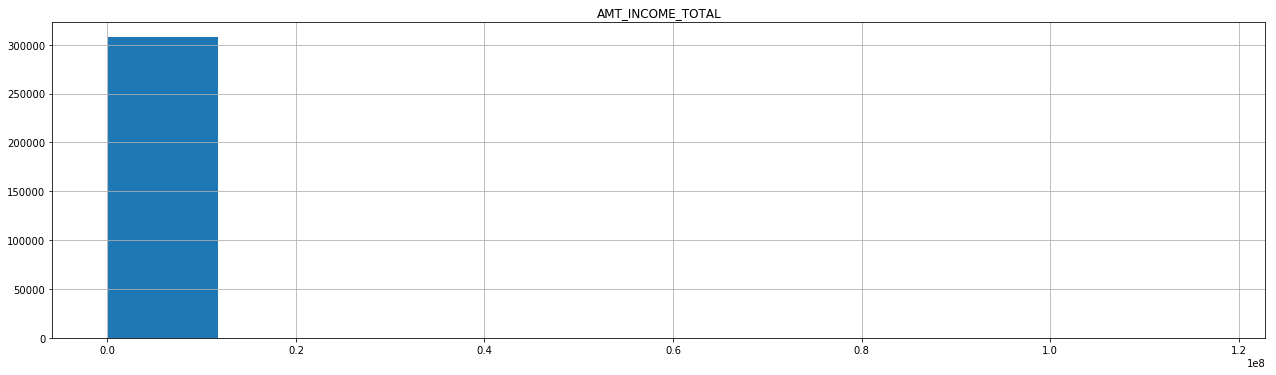

In [9]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

ser = pd.Series(app_train['AMT_INCOME_TOTAL'], dtype='int64')
 
df1 = pd.DataFrame(ser) 
df1.hist(layout=(40,2),figsize=(50,300))

In [10]:
# 最大值離平均與中位數很遠
print((app_train['AMT_INCOME_TOTAL']/100000).describe())

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64


### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [11]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL']/10000.describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

SyntaxError: invalid syntax (<ipython-input-11-aa973dcd08ad>, line 2)

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [ ]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

In [ ]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [ ]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()